# Breast Cancer Prediction Dataset

### About Dataset

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [182]:
#importing all necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as pl

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import scipy.optimize as opt
import seaborn as sns
sns.set_style('whitegrid')

#Import models from scikit learn module:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [116]:
# Allows us to test parameters of classification algorithms and find the best one


### Extraction of data

In [117]:
df = pd.read_excel(r'C:\Users\user\Desktop\dataset\data.xls')

In [118]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [120]:
df.shape

(569, 32)

In [121]:
len(df)

569

### Data Cleaning

In [122]:
#evaluate missing data.
missing_data = df.isnull()
missing_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    569
Name: id, dtype: int64

diagnosis
False    569
Name: diagnosis, dtype: int64

radius_mean
False    569
Name: radius_mean, dtype: int64

texture_mean
False    569
Name: texture_mean, dtype: int64

perimeter_mean
False    569
Name: perimeter_mean, dtype: int64

area_mean
False    569
Name: area_mean, dtype: int64

smoothness_mean
False    569
Name: smoothness_mean, dtype: int64

compactness_mean
False    569
Name: compactness_mean, dtype: int64

concavity_mean
False    569
Name: concavity_mean, dtype: int64

concave points_mean
False    569
Name: concave points_mean, dtype: int64

symmetry_mean
False    569
Name: symmetry_mean, dtype: int64

fractal_dimension_mean
False    569
Name: fractal_dimension_mean, dtype: int64

radius_se
False    569
Name: radius_se, dtype: int64

texture_se
False    569
Name: texture_se, dtype: int64

perimeter_se
False    569
Name: perimeter_se, dtype: int64

area_se
False    569
Name: area_se, dtype: int64

smoothness_se
False    569
Name: smo

In [124]:
df.drop('id',axis=1,inplace=True)
# size of the dataframe

In [125]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [126]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [127]:
#lets assign M = malignant:1(available), B = benign:0(not available)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [128]:
df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


### Explorative Data Analysis

In [129]:
#checking the datatype of each column
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [130]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [131]:
df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [133]:
df['diagnosis'].value_counts().to_frame()

,diagnosis
0,357
1,212


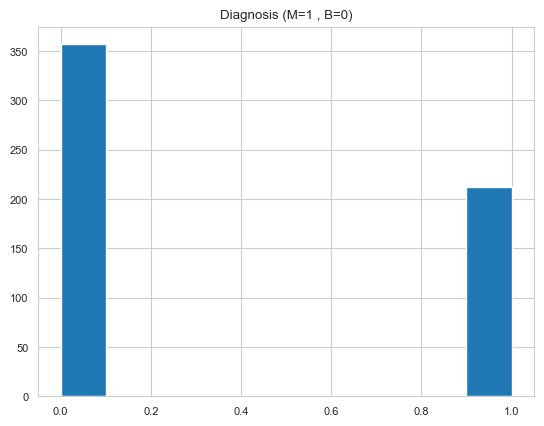

In [134]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [135]:
#checking the correllation with the target
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

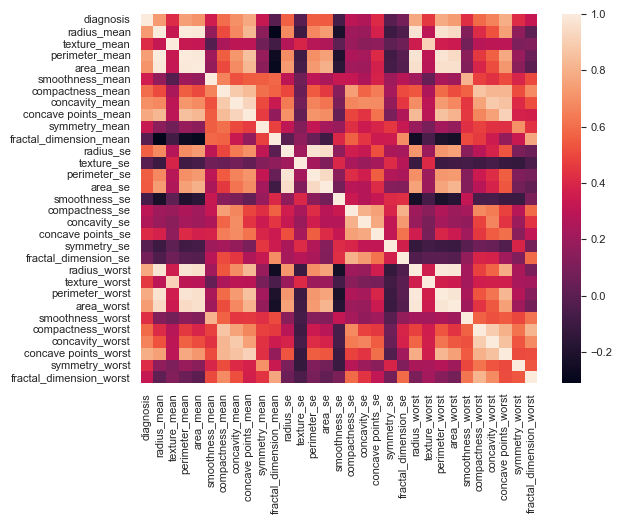

In [136]:
# Heatmap
sns.heatmap(df.corr(), annot=False)
plt.show()

In [137]:
#Creating a new Cancer_rate column  where 1 = Cancer risky and 0 = Cancer not risky
def set_name(diagnosis):
    if diagnosis == 1:
        return 'Cancer risky'
    else:
        return 'Cancer not risky'
    
    
df['Cancer_rate'] = df['diagnosis'].apply(set_name)
df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cancer_rate
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,Cancer not risky
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,Cancer not risky
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,Cancer not risky
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,Cancer risky
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,Cancer risky
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,Cancer risky
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,Cancer risky
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,Cancer risky
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,Cancer risky
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,Cancer not risky


<AxesSubplot:xlabel='Cancer_rate', ylabel='count'>

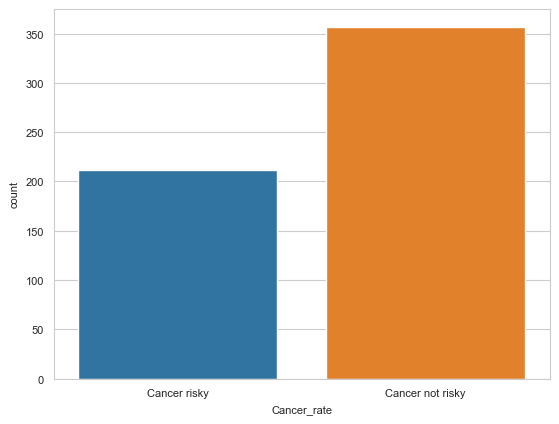

In [138]:
sns.countplot(data = df, x ='Cancer_rate' ,label ="count")

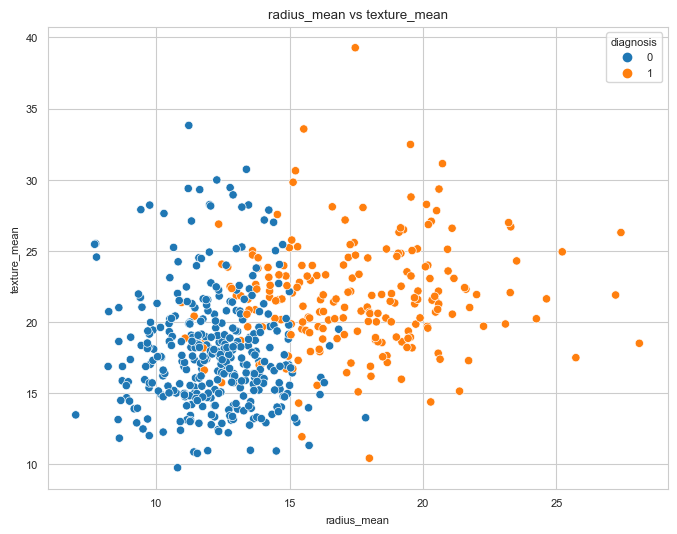

<Figure size 640x480 with 0 Axes>

In [139]:
plt.figure(figsize=(8,6))

plt.title('radius_mean vs texture_mean')
sns.scatterplot(x=df['radius_mean'],y=df['texture_mean'],hue=df['diagnosis'])
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

plt.show()
plt.tight_layout()

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'radius_mean distribution')

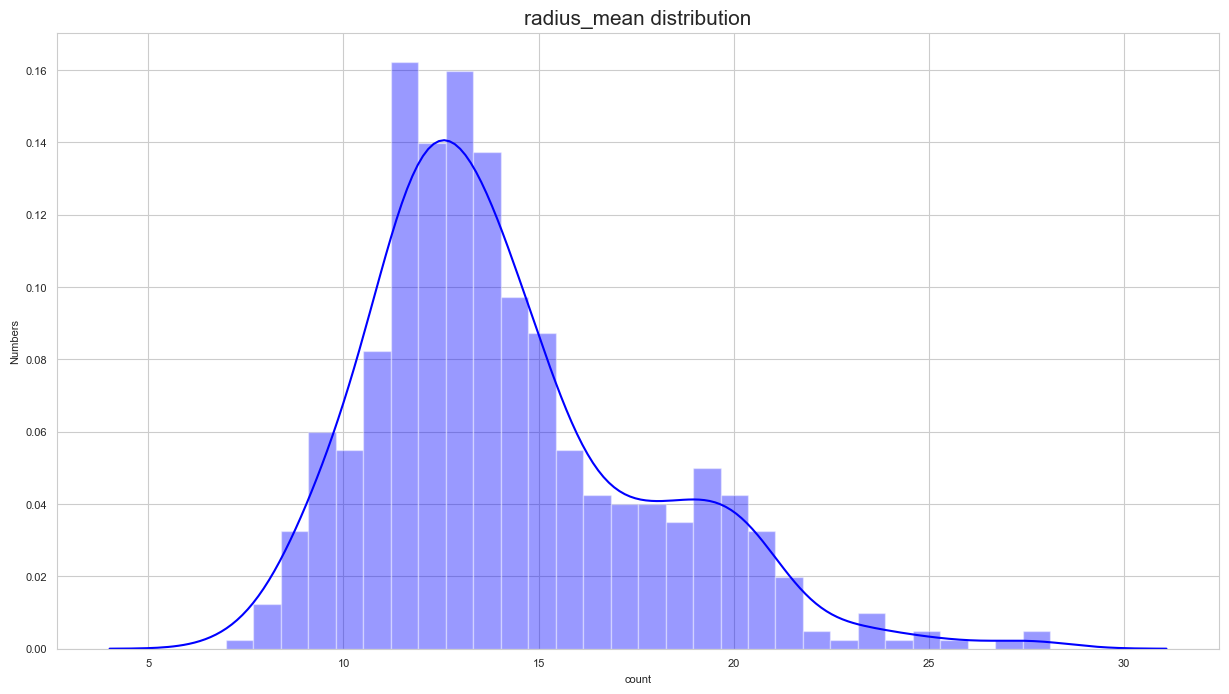

In [140]:
plt.figure(figsize=(15,8))
sns.distplot(df['radius_mean'], hist=True, bins=30, color='blue')
plt.xlabel('count')
plt.ylabel('Numbers')
plt.title('radius_mean distribution', fontsize=15)

In [141]:
data=df.sample(n=50,random_state=42)

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'radius_mean distribution')

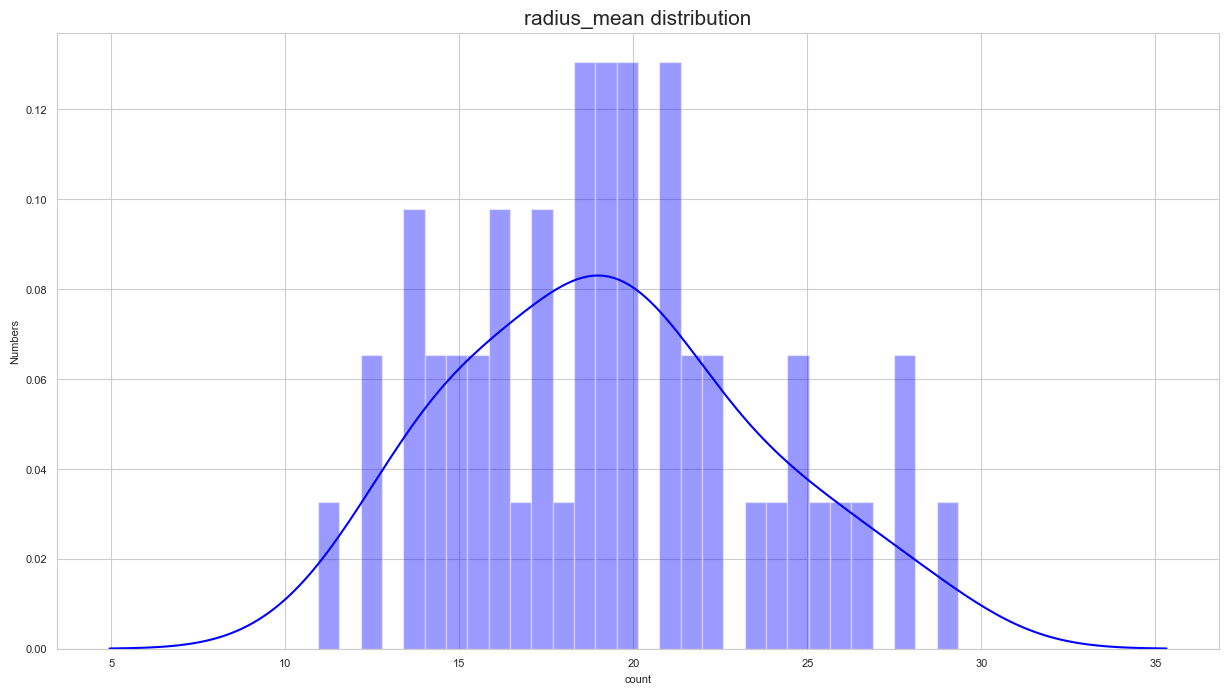

In [142]:
plt.figure(figsize=(15,8))
sns.distplot(data['texture_mean'], hist=True, bins=30, color='blue')
plt.xlabel('count')
plt.ylabel('Numbers')
plt.title('radius_mean distribution', fontsize=15)

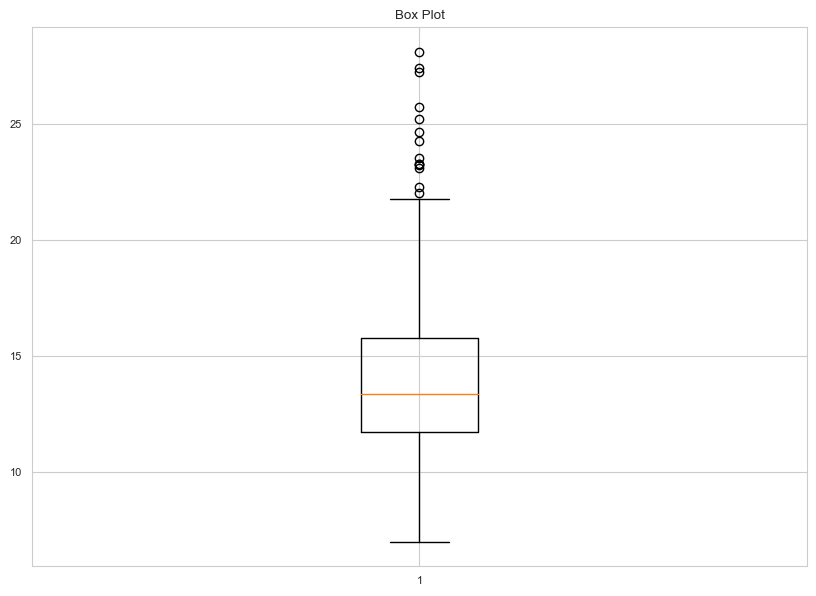

In [143]:
fig = plt.figure(figsize =(10, 7)) 

plt.boxplot(df['radius_mean'])

plt.title("Box Plot")

plt.show()

In [144]:
#using the variables in column 2-11 to analyse our data
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

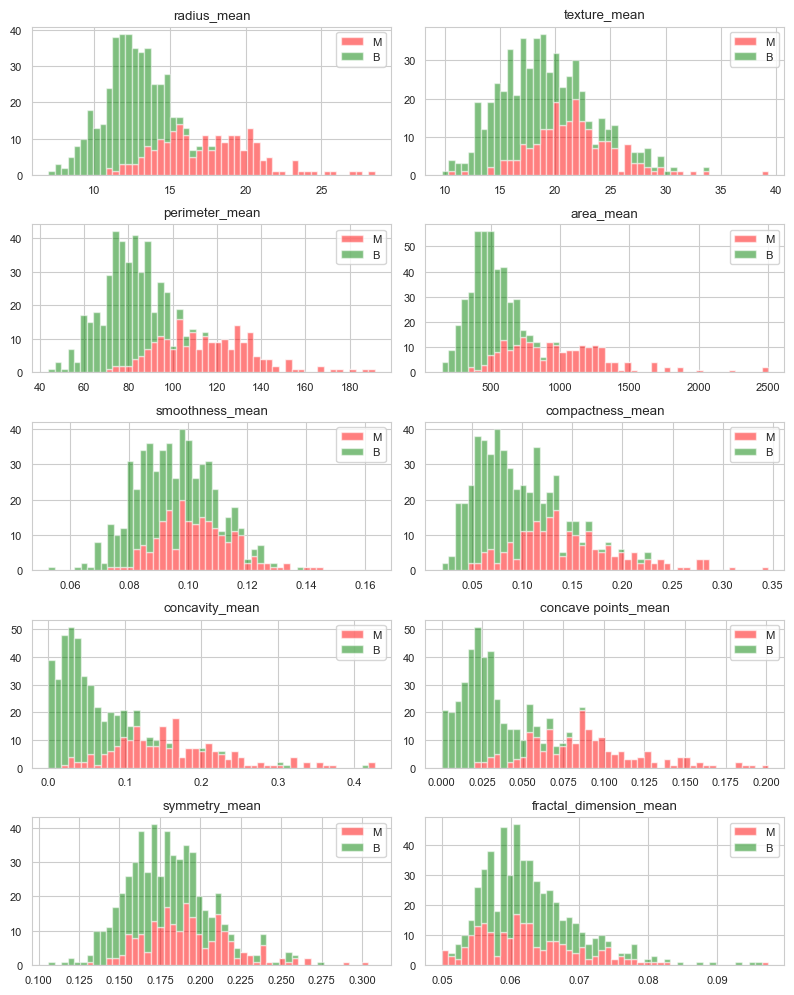

In [145]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Report
From the visualisation, it can deduced that the higher the values of these parameters the higher the correlation with malignant tumors, especially cell radius_mean, perimeter, area, compactness, concavity and concave points.

texture_mean, smoothness, symmetry_mean does not show a defined correllation with the diagnosis.

In [146]:
X=df.drop(['diagnosis', 'Cancer_rate'], axis=1)
y = df['diagnosis']

In [147]:
#we normalize the dataset:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[ 1.1 , -2.07,  1.27,  0.98,  1.57,  3.28,  2.65,  2.53,  2.22,
         2.26,  2.49, -0.57,  2.83,  2.49, -0.21,  1.32,  0.72,  0.66,
         1.15,  0.91,  1.89, -1.36,  2.3 ,  2.  ,  1.31,  2.62,  2.11,
         2.3 ,  2.75,  1.94]])

In [148]:
#we split the dataset into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


In [149]:
y_test[0:5]

340    0
382    0
300    1
262    1
363    0
Name: diagnosis, dtype: int64

In [150]:
y_train[0:5]

342    0
138    1
434    0
47     1
64     1
Name: diagnosis, dtype: int64

### LOGISTIC REGRESSION

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [152]:
##LogisticRegression(C=0.01, solver='liblinear')
##Now we can predict using our test set:

yhat = LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

### Evaluation

In [153]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.53, 0.47],
       [0.89, 0.11],
       [0.01, 0.99],
       [0.1 , 0.9 ],
       [0.54, 0.46]])

In [154]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9382716049382716

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[33  1]
 [ 4 76]]


Confusion matrix, without normalization
[[33  1]
 [ 4 76]]


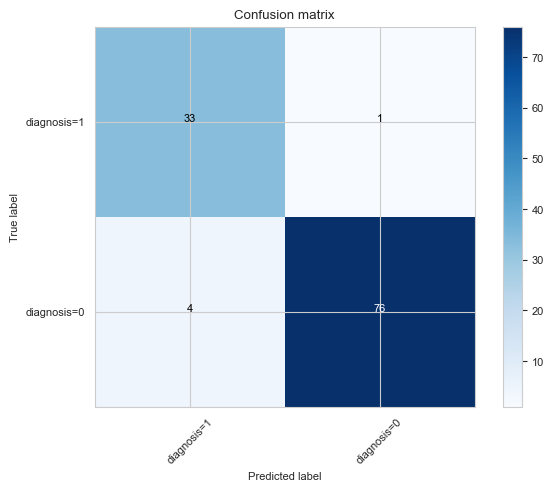

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['diagnosis=1','diagnosis=0'],normalize= False,  title='Confusion matrix')

In [157]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.89      0.97      0.93        34

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### HYPERPARAMETER TUNING FOR LR

In [244]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

In [245]:
lr=LogisticRegression()
lr

LogisticRegression()

In [246]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [247]:
logreg_cv=logreg_cv.fit(X_train, y_train)

In [248]:
yhat=logreg_cv.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

### Evaluation

In [249]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.95

In [250]:
# Print the tuned parameters and score
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9824154589371981


In [251]:
from sklearn.metrics import accuracy_score

yhat=logreg_cv.predict(X_test)
print("LOGISTIC REGRESSION's Accuracy: ", logreg_cv.score(X_test, y_test))
print("Accuracy: ", accuracy_score(y_test, yhat))

LOGISTIC REGRESSION's Accuracy:  0.9649122807017544
Accuracy:  0.9649122807017544


In [252]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.89      1.00      0.94        34

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [187]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['diagnosis=1','diagnosis=0']); ax.yaxis.set_ticklabels(['diagnosis=1','diagnosis=0']) 
    plt.show() 

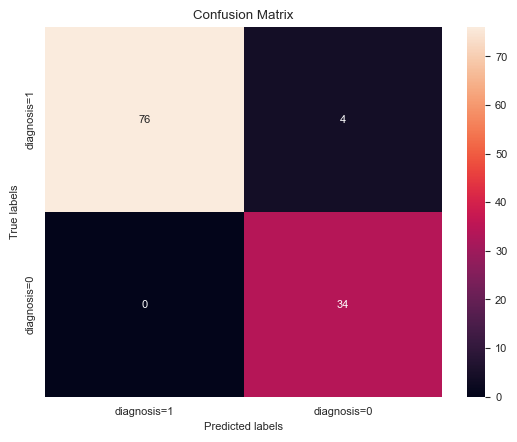

In [188]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  0]
 [ 4 76]]


Confusion matrix, without normalization
[[34  0]
 [ 4 76]]


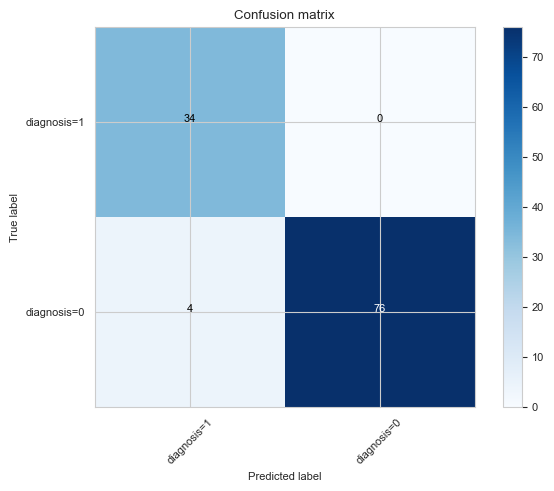

In [166]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['diagnosis=1','diagnosis=0'],normalize= False,  title='Confusion matrix')

In [167]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.89      1.00      0.94        34

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



### SUPPORT_VECTOR_MACHINE

In [190]:
from sklearn import svm
df= svm.SVC(kernel='rbf')
df=df.fit(X_train, y_train)

In [191]:
yhat = df.predict(X_test)
yhat [:]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0], dtype=int64)

In [192]:
print("svm's Accuracy: ",df.score(X_test,y_test))

svm's Accuracy:  0.9736842105263158


In [193]:
jaccard_score(y_test, yhat,pos_label=0)

0.9625

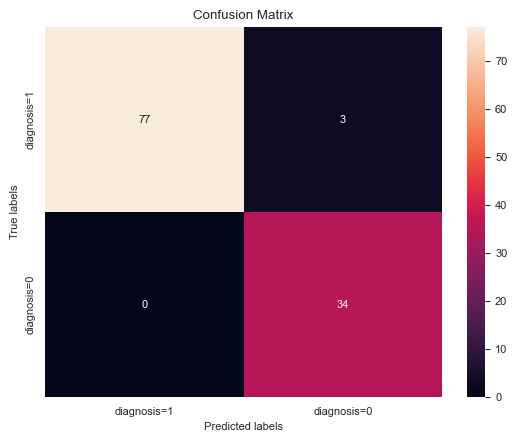

In [194]:
plot_confusion_matrix(y_test,yhat)

In [225]:
#Another Parameter
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [226]:
yhat = svm.predict(X_test)
yhat [:]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0], dtype=int64)

In [227]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        80
           1       0.92      1.00      0.96        34

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [229]:
print("svm's Accuracy: ",df.score(X_test,y_test))

svm's Accuracy:  0.9736842105263158


In [228]:
jaccard_score(y_test, yhat,pos_label=0)

0.9625

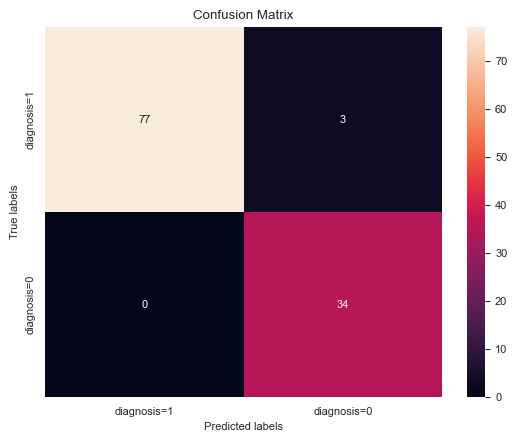

In [230]:
plot_confusion_matrix(y_test,yhat)

### more parameters

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C': [0.5,1,10,100],
     'gamma': ['scale',1,0.1,0.001,0.0001],
     'kernel': ['linear','rbf', 'sigmoid']}
 
svm_cv = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
svm_cv.fit(X_train,y_train)

svm = SVC()

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.5, gamma=scale, k

In [254]:
svm_cv.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [255]:
svm_cv.best_estimator_

SVC(C=0.5, kernel='linear')

In [256]:
svm_cv_predictions = svm_cv.predict(X_test)
svm_cv_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0], dtype=int64)

In [257]:
jaccard_score(y_test, yhat,pos_label=0)

0.95

In [262]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, yhat))

Accuracy:  0.9649122807017544


In [263]:
print("svm's Accuracy: ",df.score(X_test,y_test))

svm's Accuracy:  0.9736842105263158


In [259]:
print(confusion_matrix(y_test,yhat))

[[76  4]
 [ 0 34]]


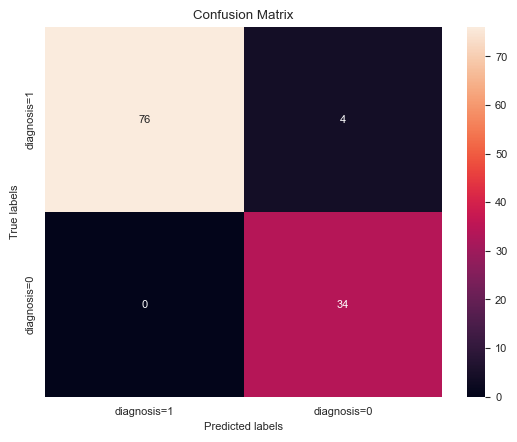

In [260]:
plot_confusion_matrix(y_test,yhat)

## DECISION TREE

In [200]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [201]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [202]:
tree_cv=tree_cv.fit(X_train,y_train)

In [203]:
yhat=tree_cv.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [205]:
print ('Predicted:',yhat [0:5])
print ('Existing:',y_test [0:5])

Predicted: [1 0 1 1 1]
Existing: 340    0
382    0
300    1
262    1
363    0
Name: diagnosis, dtype: int64


In [206]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.9298245614035088


In [207]:
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [208]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9582608695652175


In [210]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9012345679012346

In [211]:
print("DecisionTree's Accuracy: ",tree_cv.score(X_test,y_test))
print("DecisionTree's Accuracy: ", accuracy_score(y_test, yhat))

DecisionTree's Accuracy:  0.9298245614035088
DecisionTree's Accuracy:  0.9298245614035088


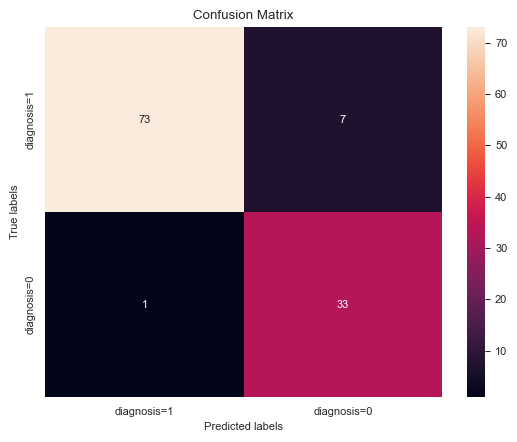

In [212]:
plot_confusion_matrix(y_test,yhat)

In [214]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        80
           1       0.82      0.97      0.89        34

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114



### K-NEAREST NIEGHBOUR. KNN

In [216]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [217]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [218]:
knn_cv.fit(X_train,y_train)

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [219]:
yhat = knn_cv.predict(X_test)
yhat

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [220]:
print("best :",tree_cv.best_score_)
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

best : 0.9582608695652175
Test set Accuracy:  0.9649122807017544


In [222]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9506172839506173

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


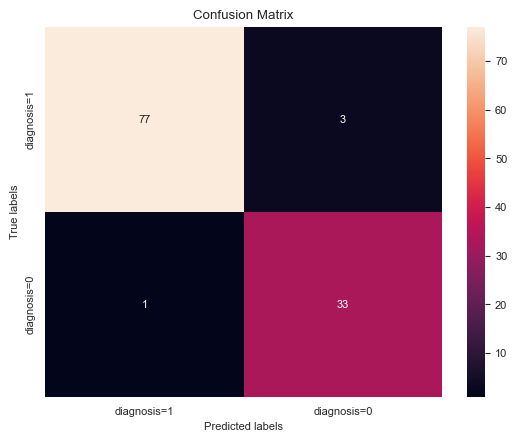

In [224]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

From above the Support Vector Machine SVM is the best model to be used for diagnosing breast cancer as found in this analysis. 

In [265]:
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)